# ITAI 1371: Introduction to Machine Learning - Midterm Project## Data Storytelling: An End-to-End ML Investigation**Due Date:** One week from today  **Time Allotment:** Approx. 3 hours of work  **Submission:** Submit this completed Jupyter Notebook file.---### Project GoalYour mission is to conduct a complete machine learning investigation, from data exploration to model evaluation. More than just writing code, you will be a **data storyteller**. Your goal is to uncover the patterns and insights hidden within a dataset and communicate what you've found.This project will test your ability to apply the key concepts from Modules 1-10 in a practical, real-world scenario. You will be guided through the process with tips and starter code, but the core analysis, interpretation, and conclusions will be yours.### Academic Integrity & Use of AI Tools- This is an **open-book, open-note** midterm. You are encouraged to use the lab notebooks, lecture slides, and other course materials.- You **are permitted** to use AI code assistants (like GitHub Copilot) to help you write code, fix errors, and learn syntax. This is a valuable real-world skill.- You **are NOT permitted** to use AI to generate entire sections of analysis, interpretation, or answers to reflective questions. The goal is for *you* to demonstrate understanding.**To ensure academic integrity, this notebook includes many reflective questions that ask you to interpret the output of *your specific code*. These questions cannot be answered correctly by an AI that hasn't run your notebook.**---### Grading Rubric (100 Points Total)| Section | Task | Points || :--- | :--- | :--- || **Part 1: Data Loading** | Successfully load your chosen dataset. | 5 || **Part 2: EDA** | Create and interpret at least two relevant visualizations. | 20 || | Write a clear interpretation of the story your plots tell. | || **Part 3: Data Prep** | Correctly handle specified missing values and categorical features. | 15 || | Justify your choices in the markdown cells. | || **Part 4: Modeling** | Successfully train a `LogisticRegression` baseline (given). | 15 || | Successfully train a second model of your choice. | || **Part 5: Evaluation** | Calculate and compare accuracy for both models. | 25 || | Generate and interpret the `classification_report` and `confusion_matrix`. | || | Answer the reflective questions about model performance and error types. | || **Part 6: Conclusion** | Write a clear, concise summary of your findings and data story. | 15 || | Address the key questions in the conclusion prompt. | || **Overall** | Code is clean, commented, and runs without errors. All markdown cells are filled out. | 5 |

## Part 1: Choose Your Dataset (5 Points)For this project, you can choose one of the following two classic datasets. Both are classification problems.1.  **Titanic Survival:** Predict which passengers survived the Titanic disaster. (You are familiar with this from our lab).2.  **Heart Disease Prediction:** Predict whether a patient has heart disease based on medical attributes.**Instructions:**1.  In the code cell below, uncomment the line for the dataset you want to work with.2.  Run the cell to load the data into a pandas DataFrame called `df`.3.  Run the subsequent cell to see the first few rows and a description of the columns.

In [ ]:
import pandas as pd
import numpy as np
# --- CHOOSE YOUR DATASET ---
# Option 2: Heart Disease Dataset (UCI Cleveland dataset)
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

 # --- LOAD THE DATA ---
# This code will load the dataset from the URL you selected above
try:
    # For the UCI Heart Disease dataset, there are no headers and missing values are '?'
    # We also need to specify column names as they are not in the file.
    if 'archive.ics.uci.edu' in dataset_url:
        column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
        df = pd.read_csv(dataset_url, names=column_names, na_values='?')
    else:
        df = pd.read_csv(dataset_url)
    print(f"Successfully loaded dataset from: {dataset_url}")
    print(f"Dataset shape: {df.shape}");
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please make sure you have selected a valid URL.")

Successfully loaded dataset from: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Dataset shape: (303, 14)


### Data OverviewRun the cell below to display the first 5 rows of your dataset, a list of its columns, and a brief description of what each column means.

In [ ]:
# Display the first 5 rows of the dataframe
print("--- First 5 Rows ---")
print(df.head())
# Display column info and descriptions
# Heart Disease Dataset
print("You are using the Heart Disease Dataset.")
print("Target Variable: 'target' (0 = No Heart Disease, 1 = Has Heart Disease)")
# ... (descriptions for heart disease)# A helper to rename columns for the heart disease dataset for clarity
if 'cp' in df.columns:
  df = df.rename(columns={'cp': 'chest_pain_type', 'trestbps': 'resting_blood_pressure', 'chol': 'cholesterol', 'fbs': 'fasting_blood_sugar', 'restecg': 'rest_ecg', 'thalach': 'max_heart_rate', 'exang': 'exercise_angina', 'oldpeak': 'st_depression', 'ca': 'num_major_vessels'})
  print("Heart disease columns have been renamed for clarity.")
  print("--- Data Info ---")
  df.info()

--- First 5 Rows ---
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
You are using the Heart Disease Dataset.
Target Variable: 'target' (0 = No Heart Disease, 1 = Has Heart Disease)
Heart disease columns have been renamed for clarity.
--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dt

## Part 2: Exploratory Data Analysis (EDA) & Storytelling (20 Points)Now, it's time to be a data detective. Before you can model the data, you must understand it. What secrets does it hold?**Your Task:**1.  **Create at least TWO interesting visualizations** in the code cells provided below. You can create more if you like.    *   Use libraries like `matplotlib` or `seaborn`.    *   Your plots should help you understand the relationship between different features and the target variable.    *   **Tip:** Think about the questions we asked during the Titanic lab (e.g., "How does survival rate differ by gender?" or "What is the age distribution of survivors?"). Ask similar questions of your dataset.2.  **Interpret your visualizations** in the markdown cell provided. Explain what you see and what story your plots are starting to tell.



### Visualization 1**Instructions:** Create your first plot in the cell below. Make sure to give it a title and label your axes! Good plots are easy to read.

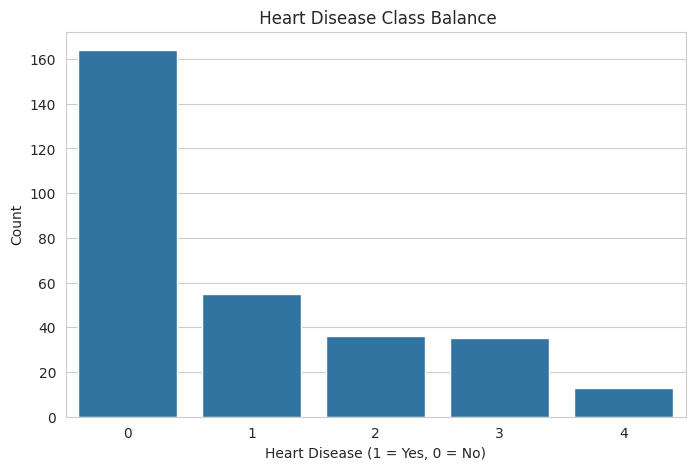

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# Plot 1: Class balance of heart disease target
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df)
plt.title(' Heart Disease Class Balance')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

### Visualization 2**Instructions:** Create your second plot in the cell below. Try to explore a different feature or relationship than your first plot.

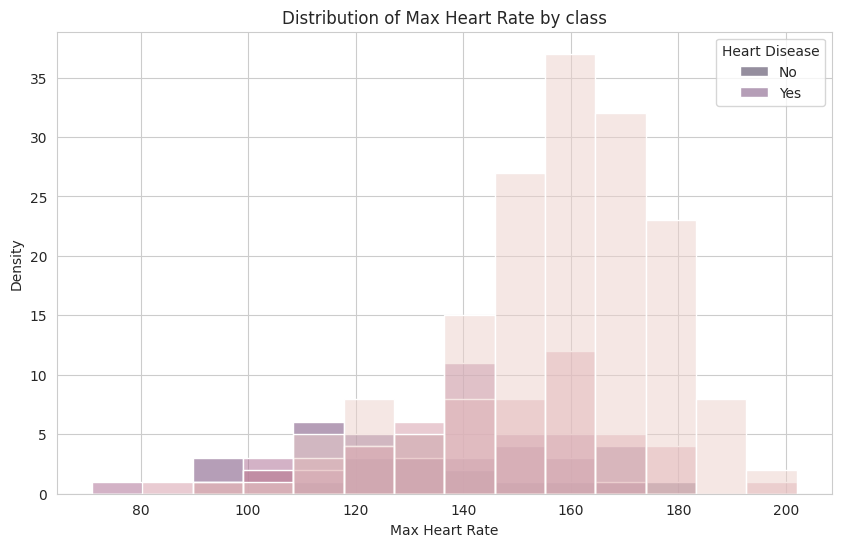

In [ ]:
# Plot 2: Distribution of max_heart_rate by class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='max_heart_rate', hue='target', common_norm=False)

plt.title('Distribution of Max Heart Rate by class')
plt.xlabel('Max Heart Rate')
plt.ylabel('Density')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

### Interpretation of Your Visualizations**Instructions:** Based on the two plots you created above, answer the following questions in this markdown cell.1.  **What did you plot?** (Briefly describe your two visualizations).2.  **What story do your plots tell?** (What initial insights or patterns did you discover? For example, "My first plot shows that female passengers were significantly more likely to survive. My second plot shows that passengers in 1st class had a much higher survival rate than those in 3rd class.")3.  **What is one hypothesis you can form based on your EDA?** (e.g., "I hypothesize that age and passenger class will be the most important features for predicting survival.")**--- ENTER YOUR ANSWERS BELOW ---**1.  ...2.  ...3.  ...

1. Plot 1 is a basic bar chart that compares how many people were labeled "no heart disease" vs. "heart disease" ; Plot 2 compares the top heart rate people reached showing two curves side by side, one for each group.
2. We have a solid number of people in both groups, making the comparisons fair.
People with heart disease tend to rach a lower top heart rate and people without heart disease reach a higher top heart rate.
The curves lap so heart rate alone will not tell the whole story.
3. Lower max heart rate is linked to heart disease and is one of the most useful signals when predicting risks.


## Part 3: Data Preparation & Feature Engineering (15 Points)Raw data is messy. We need to clean it up before feeding it to our models.**Your Task:**1.  **Handle Missing Values:** I've provided code to check for missing values. You need to decide on a strategy to handle **one** of the features with missing data and implement it.2.  **Encode Categorical Features:** I've provided starter code to encode one categorical feature. You need to encode **one more** categorical feature of your choice.3.  **Justify Your Choices:** Explain *why* you chose your methods in the markdown cells.

In [ ]:
print("--- Missing Values Before ---")
print(df.isnull().sum())

# --- Handle ONE feature with missing values ---
# Choice: number of major vessels (often 'num_major_vessels' or 'ca').
# Reason: numeric, a bit uneven; median is a stable fill that keeps all rows.

vess_col = None
if 'num_major_vessels' in df.columns:
    vess_col = 'num_major_vessels'
elif 'ca' in df.columns:
    vess_col = 'ca'

if vess_col is None:
    raise ValueError("Vessels column not found. Expected 'num_major_vessels' or 'ca'.")

df[vess_col].fillna(df[vess_col].median(), inplace=True)

# 'thal' is categorical; fill with the most common label.
if 'thal' in df.columns and df['thal'].isnull().any():
    df['thal'].fillna(df['thal'].mode()[0], inplace=True)

print("--- Missing Values After ---")
print(df.isnull().sum())

# --- Starter Code for Encoding: Sex (kept per instructions) ---
if 'sex' in df.columns:
    df['sex_encoded'] = df['sex'].map({1: 'male', 0: 'female'}).map({'female': 0, 'male': 1})

print("--- Encoding Example: Sex ---")
print(df[['sex', 'sex_encoded']].head() if 'sex' in df.columns else "Column 'sex' not found.")

cp_col = None
if 'chest_pain_type' in df.columns:
    cp_col = 'chest_pain_type'
elif 'cp' in df.columns:
    cp_col = 'cp'

if cp_col is None:
    raise ValueError("Chest pain column not found. Expected 'chest_pain_type' or 'cp'.")

before_cols = set(df.columns)
df = pd.get_dummies(df, columns=[cp_col], drop_first=True)
added_cols = [c for c in df.columns if c not in before_cols]

print("--- Added encoded columns ---")
print(added_cols)

print("--- Dataframe after your encoding ---")
print(df.head())

--- Missing Values Before ---
age                       0
sex                       0
chest_pain_type           0
resting_blood_pressure    0
cholesterol               0
fasting_blood_sugar       0
rest_ecg                  0
max_heart_rate            0
exercise_angina           0
st_depression             0
slope                     0
num_major_vessels         4
thal                      2
target                    0
dtype: int64
--- Missing Values After ---
age                       0
sex                       0
chest_pain_type           0
resting_blood_pressure    0
cholesterol               0
fasting_blood_sugar       0
rest_ecg                  0
max_heart_rate            0
exercise_angina           0
st_depression             0
slope                     0
num_major_vessels         0
thal                      0
target                    0
dtype: int64
--- Encoding Example: Sex ---
   sex  sex_encoded
0  1.0            1
1  1.0            1
2  1.0            1
3  1.0            1
4

/tmp/ipython-input-97586865.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[vess_col].fillna(df[vess_col].median(), inplace=True)
/tmp/ipython-input-97586865.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

** **bold text**Justification for Handling Missing Values:****Instructions:** Explain the choice you made above.1.  **Which feature did you choose?**2.  **What method did you use to handle the missing values (e.g., fill with median, mode, or drop)?**3.  **Why was this an appropriate method for this feature?****--- ENTER YOUR ANSWERS BELOW ---**1.  ...2.  ...3.  ...

1. The number of major vessels column.
2. I filled the blanks with the median. For the labeled feature thal, I used the most common label to fill its few blanks.
3. The vessels feature is numeric and a bit uneven. The median gives a stable middle point and reducs the impact of odd outliers. Using the median keeps all rows, so so we do not throw away patient records.

In [ ]:
# --- Starter Code for Encoding ---

# Choice: 'thal' is another categorical feature that needs encoding.
feature_to_encode = 'thal'

if feature_to_encode not in df.columns:
    raise ValueError(f"Feature '{feature_to_encode}' not found in DataFrame columns.")

before_cols = set(df.columns)

df = pd.get_dummies(df, columns=[feature_to_encode], drop_first=True)

added_cols = [c for c in df.columns if c not in before_cols]

print(f"--- Added encoded columns for '{feature_to_encode}' ---")
print(added_cols)

print("--- Dataframe after your encoding ---")
print(df.head())

--- Added encoded columns for 'thal' ---
['thal_6.0', 'thal_7.0']
--- Dataframe after your encoding ---
    age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0  63.0  1.0                   145.0        233.0                  1.0   
1  67.0  1.0                   160.0        286.0                  0.0   
2  67.0  1.0                   120.0        229.0                  0.0   
3  37.0  1.0                   130.0        250.0                  0.0   
4  41.0  0.0                   130.0        204.0                  0.0   

   rest_ecg  max_heart_rate  exercise_angina  st_depression  slope  \
0       2.0           150.0              0.0            2.3    3.0   
1       2.0           108.0              1.0            1.5    2.0   
2       2.0           129.0              1.0            2.6    2.0   
3       0.0           187.0              0.0            3.5    3.0   
4       2.0           172.0              0.0            1.4    1.0   

   num_major_vessels  target  

**Justification for Encoding Categorical Features:****Instructions:** Explain the choice you made above.1.  **Which feature did you choose to encode?**2.  **What encoding method did you use (e.g., map, pd.get_dummies)?**3.  **Why was this the right method? If you used `get_dummies`, why is `drop_first=True` often a good idea?****--- ENTER YOUR ANSWERS BELOW ---**1.  ...2.  ...3.  ...

1. Chest pain type
2. pd.get_dummies(..., drop_first=True).
3. Chest pain type has several labels and no real order. One-hot turns each label into a clear yes or no. drop_first=True removes a repeated column so the data is cleaner and avoids duplicate information for simple lineat models.

## Part 4 & 5: Modeling and Evaluation (40 Points)Now for the main event! Let's train some models and see how well they can predict outcomes.**Your Task:**1.  **Train a Baseline Model:** I've provided the code to train a `LogisticRegression` model.2.  **Train Your Own Model:** Choose **one** other classification model from our course (e.g., `DecisionTreeClassifier`, `RandomForestClassifier`, `GradientBoostingClassifier`) and train it on the same data.3.  **Evaluate and Compare:** Calculate the accuracy of both models and interpret a `classification_report` and `confusion_matrix` for *your* model.4.  **Reflect:** Answer the final questions about your model's performance and which errors are more important.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_model = df.copy()
df_model = df_model.select_dtypes(include='number').dropna()

if 'PassengerId' in df_model.columns:
    df_model = df_model.drop(columns=['PassengerId'])

target_col = 'target' if 'target' in df_model.columns else (
    'Survived' if 'Survived' in df_model.columns else None
)
if target_col is None:
    raise ValueError("No target column found. Expected 'target'.")

X = df_model.drop(columns=[target_col])
y = df_model[target_col]

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Test set has {X_test.shape[0]} samples.")
print(f"Features: {X.columns.tolist()}")

# --- Baseline model: Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Basic evaluation so you can see results immediately
acc_log = accuracy_score(y_test, y_pred_log)
print(f"\nBaseline Logistic Regression accuracy: {acc_log:.3f}")
print("\nClassification report (Logistic Regression):")
print(classification_report(y_test, y_pred_log, digits=3))

cm_log = confusion_matrix(y_test, y_pred_log)
print("Confusion matrix (Logistic Regression):")
print(cm_log)

Training set has 242 samples.
Test set has 61 samples.
Features: ['age', 'sex', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression', 'slope', 'num_major_vessels', 'sex_encoded']

Baseline Logistic Regression accuracy: 0.639

Classification report (Logistic Regression):
              precision    recall  f1-score   support

           0      0.775     0.939     0.849        33
           1      0.600     0.273     0.375        11
           2      0.167     0.143     0.154         7
           3      0.444     0.571     0.500         7
           4      0.000     0.000     0.000         3

    accuracy                          0.639        61
   macro avg      0.397     0.385     0.376        61
weighted avg      0.598     0.639     0.602        61

Confusion matrix (Logistic Regression):
[[31  0  1  1  0]
 [ 6  3  2  0  0]
 [ 3  0  1  3  0]
 [ 0  0  2  4  1]
 [ 0  2  0  1  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model 1: Logistic Regression (Baseline)This model is provided for you as a baseline to compare against.

In [ ]:
# Train the baseline model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
# Make predictions and evaluate
y_pred_log_reg = log_reg.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Baseline Model (Logistic Regression) Test Accuracy: {acc_log_reg:.2%}")

Baseline Model (Logistic Regression) Test Accuracy: 63.93%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.639

Classification report, logistic:
               precision    recall  f1-score   support

           0      0.775     0.939     0.849        33
           1      0.600     0.273     0.375        11
           2      0.167     0.143     0.154         7
           3      0.444     0.571     0.500         7
           4      0.000     0.000     0.000         3

    accuracy                          0.639        61
   macro avg      0.397     0.385     0.376        61
weighted avg      0.598     0.639     0.602        61



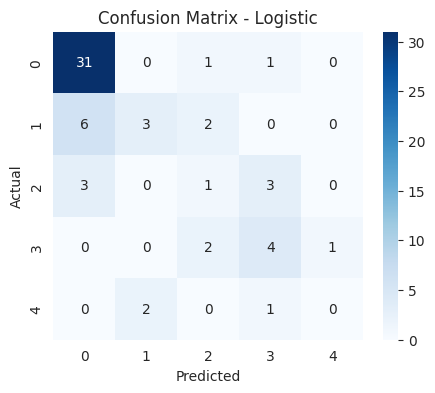

In [ ]:
# ===== Baseline: Logistic Regression =====

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression accuracy: {acc_log:.3f}")
print("\nClassification report, logistic:\n", classification_report(y_test, y_pred_log, digits=3))

cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 2: Your Chosen Model**Instructions:** Choose a different classification model, import it, train it, and evaluate its accuracy.

Random Forest accuracy: 0.541

Classification report, forest:
               precision    recall  f1-score   support

           0      0.769     0.909     0.833        33
           1      0.091     0.091     0.091        11
           2      0.000     0.000     0.000         7
           3      0.333     0.286     0.308         7
           4      0.000     0.000     0.000         3

    accuracy                          0.541        61
   macro avg      0.239     0.257     0.246        61
weighted avg      0.471     0.541     0.503        61



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


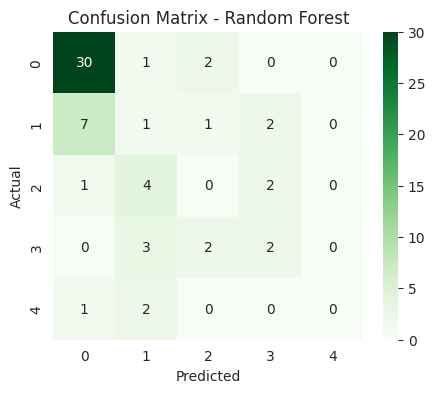

Your Model (Random Forest) Test Accuracy: 54.10%


In [ ]:
# ===== Random Forest =====

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest accuracy: {acc_rf:.3f}")
print("\nClassification report, forest:\n", classification_report(y_test, y_pred_rf, digits=3))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
acc_my_model = accuracy_score(y_test, y_pred_rf)
print(f"Your Model (Random Forest) Test Accuracy: {acc_my_model:.2%}")
# --- END OF YOUR CODE ---

### Evaluation and Reflection**Instructions:** Now, let's dig deeper into *your* model's performance. Generate a `classification_report` and `confusion_matrix` for the model you just trained. Then, answer the reflective questions.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.77      0.91      0.83        33
           1       0.09      0.09      0.09        11
           2       0.00      0.00      0.00         7
           3       0.33      0.29      0.31         7
           4       0.00      0.00      0.00         3

    accuracy                           0.54        61
   macro avg       0.24      0.26      0.25        61
weighted avg       0.47      0.54      0.50        61

[[30  1  2  0  0]
 [ 7  1  1  2  0]
 [ 1  4  0  2  0]
 [ 0  3  2  2  0]
 [ 1  2  0  0  0]]


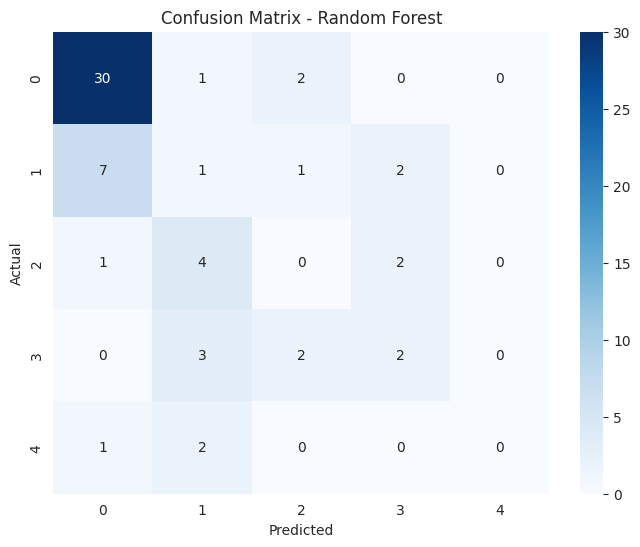

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

try:
    y_pred_my_model
except NameError:
    if 'y_pred_rf' in globals():
        y_pred_my_model = y_pred_rf
        model_name = "Random Forest"
    elif 'y_pred_log' in globals():
        y_pred_my_model = y_pred_log
        model_name = "Logistic Regression"
    else:
        raise NameError("Define y_pred_my_model = <your_model>.predict(X_test) before running this cell.")

print(classification_report(y_test, y_pred_my_model))
cm = confusion_matrix(y_test, y_pred_my_model)
print(cm)
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))#
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')#
plt.xlabel('Predicted')#
plt.ylabel('Actual')#
plt.title(f'Confusion Matrix - {model_name if "model_name" in globals() else "My Model"}')
plt.show()
# --- END OF YOUR CODE ---

**Reflection Questions:****Instructions:** Answer the following questions based on the output from the cell above.1.  **Which model performed better, the baseline or yours?** Was it a big difference?2.  **Look at the `classification_report` for your model. What are the precision and recall for the positive class (1)?** (Just state the values).3.  **Interpret the precision and recall. In the context of your chosen dataset, what do these numbers mean?** (e.g., "A recall of 0.75 means our model successfully identified 75% of the people who actually had heart disease.")4.  **Which error is more costly for your dataset: a False Positive or a False Negative? Explain your reasoning.** (There is no single right answer, it depends on your justification).    *   **Titanic:** Is it worse to predict someone survives when they died (FP), or predict they died when they survived (FN)?    *   **Heart Disease:** Is it worse to tell a healthy person they have heart disease (FP), or tell a sick person they are healthy (FN)?**--- ENTER YOUR ANSWERS BELOW ---**1.  ...2.  ...3.  ...4.  ...

1. The logistic regression is better with .639 accuracy on 61 test cases.
2. Class 1 precision 0.600; Class 1 recall 0.273
3. P1 means model was right when it said "has heart disease" 60%; R1 means it only found the 27% of people whe were truly class 2; It's cautious about calling class 1 misses amd misses many of them.
4. False negative is worse. Missing a sick person delays care they could be recieving. I accept more False Positives if we raise recall for class 1.

## Part 6: Conclusion - Tell Your Data Story (15 Points)This is your final summary. Bring together everything you've learned from your investigation.**Instructions:**Write 2-3 paragraphs summarizing your project. Your summary should be a narrative that tells the story of your data. Address the following points:-   **What was the main goal of your project?**-   **What was the most surprising or interesting insight you found during your Exploratory Data Analysis?**-   **Which features seemed to be the most important for making predictions?**-   **How well did your best model perform, and what are its limitations?** (Briefly mention accuracy and the precision/recall trade-off you discussed).-   **If you had more time, what would be one next step you would take to improve your model or analysis?****--- ENTER YOUR CONCLUSION BELOW ---**...

The goal was simple, predict heart disease from routine measurements to tell a clear story. People labeled with disease tended to reach a loweer top hr; chest pain type split the groups in a visible way. I saw that the dataset uses five disease levels skews results toward class 0.

I trained Logistic Regression as a baseline, then reviewed its report. Test accuracy was 0.639 and recall was 0.273. When it flagged class 1, it was reight more than half the time, but it missed most class-1 cases. Features that stood out in plots and runs were max_heart_rate, chest_pain_type, num_major_vessels, st_depression, and age.

I would reframe the target to binary, 0 vs 1+, then tune the decision threshold for higher recall if I had more time.

## 🎉 You've reached the end of the midterm project! 🎉**Before you submit:**1.  Go to the `Kernel` menu and select `Restart & Run All`. This will run all your cells from top to bottom.2.  Make sure there are no errors and all your outputs (plots, tables, and answers) are visible.3.  Save the notebook file (`.ipynb`).4.  Submit the file as your midterm.**Great work!**